In [2]:
# Fonots

# Ez a kis fostalicska csak arra kell, hogy belenézzek a metric_log-ba

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time
from pandas.plotting import scatter_matrix

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-29 20:26:30
20:26:30


In [3]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,14:36:32,14:36:3,119.74440,58.506014,1,6.9,20.9,65.5,31.8,...,58323.6,1471264.4,0.0,150942.8,100.0,764.3,764.3,777.8,764.3,777.8
1,192.168.0.6,14:36:40,14:36:4,112.01650,73.998219,1,9.6,43.5,26.1,71.4,...,62283.6,1474959.2,0.0,152727.6,100.0,2093.2,2093.2,2322.5,2092.1,2321.5
2,192.168.0.6,14:36:50,14:36:5,198.66010,132.528758,4,9.9,19.9,65.2,34.7,...,56614.4,1469892.0,0.0,149732.0,100.0,991.8,991.8,1267.4,991.8,1267.5
3,192.168.0.6,14:37:00,14:37:0,176.41085,135.787280,2,10.0,36.7,35.0,64.9,...,57118.4,1469887.2,0.0,149590.8,100.0,2667.6,2667.6,3033.8,2667.6,3033.9
4,192.168.0.6,14:37:14,14:37:1,3047.38640,1415.877072,1,8.3,56.3,0.5,99.5,...,58050.0,1467744.0,0.0,150241.6,100.0,3018.6,3018.6,6009.8,3018.6,6009.8


,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,14:36:32,14:36:3,119.74440,58.506014,1,6.9,20.9,65.5,31.8,...,58323.6,1471264.4,0.0,150942.8,100.0,764.3,764.3,777.8,764.3,777.8
1,192.168.0.6,14:36:40,14:36:4,112.01650,73.998219,1,9.6,43.5,26.1,71.4,...,62283.6,1474959.2,0.0,152727.6,100.0,2093.2,2093.2,2322.5,2092.1,2321.5
2,192.168.0.6,14:36:50,14:36:5,198.66010,132.528758,4,9.9,19.9,65.2,34.7,...,56614.4,1469892.0,0.0,149732.0,100.0,991.8,991.8,1267.4,991.8,1267.5
3,192.168.0.6,14:37:00,14:37:0,176.41085,135.787280,2,10.0,36.7,35.0,64.9,...,57118.4,1469887.2,0.0,149590.8,100.0,2667.6,2667.6,3033.8,2667.6,3033.9
4,192.168.0.6,14:37:14,14:37:1,3047.38640,1415.877072,1,8.3,56.3,0.5,99.5,...,58050.0,1467744.0,0.0,150241.6,100.0,3018.6,3018.6,6009.8,3018.6,6009.8


In [4]:
df['worker_give_metrics'].unique()

array(['192.168.0.6'], dtype=object)

In [5]:
pd.options.display.float_format = "{:,.2f}".format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,200.00,"2,103.01","3,779.73",41.71,193.10,334.96,"1,400.19","14,741.35"
response_time,200.00,"1,639.59","3,340.62",23.06,138.10,255.74,744.25,"13,974.87"
worker_number,200.00,4.45,2.54,1.00,2.00,4.50,7.00,8.00
request_rate,200.00,8.67,2.47,0.10,8.57,9.95,10.00,10.20
CPU0User%,200.00,32.10,16.90,4.40,18.45,26.45,53.00,57.00
CPU0Idle%,200.00,42.93,31.28,0.10,3.45,54.45,68.10,92.90
CPU0Total%,200.00,56.91,31.37,6.90,31.50,45.45,96.47,99.90
[DSK:sda]Reads,200.00,0.74,5.95,0.00,0.00,0.00,0.00,63.00
[DSK:sda]RMerge,200.00,0.24,2.30,0.00,0.00,0.00,0.00,23.00
[DSK:sda]RKBytes,200.00,17.18,147.13,0.00,0.00,0.00,0.00,"1,726.10"


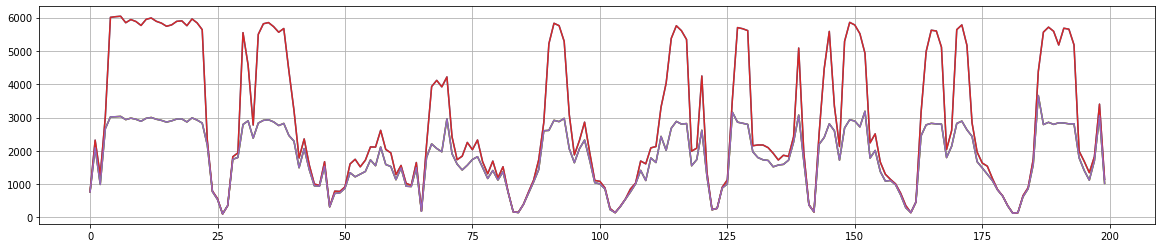

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

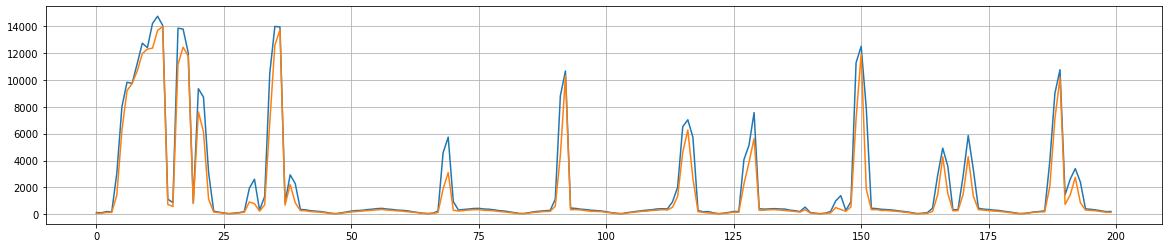

In [7]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

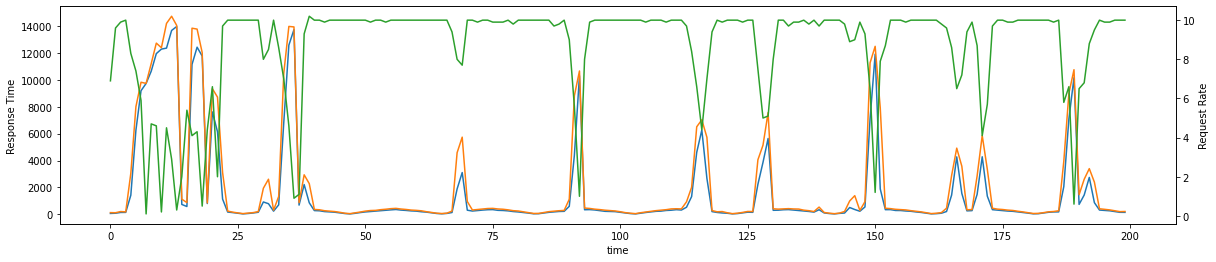

In [8]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

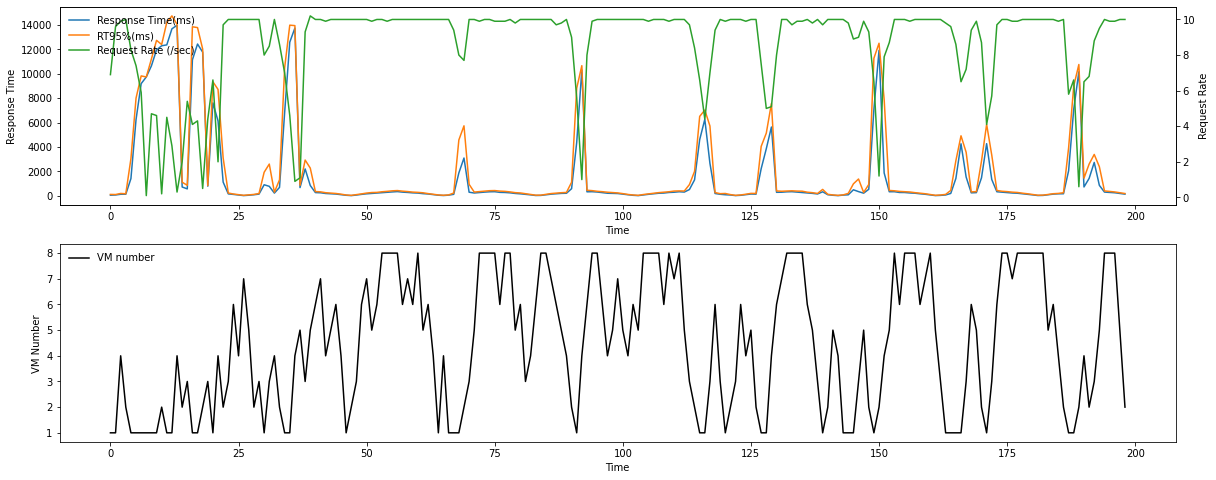

In [9]:
def show(FROM=0, TO=-1):

    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

    ax2 = ax1.twinx()

    l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

show()

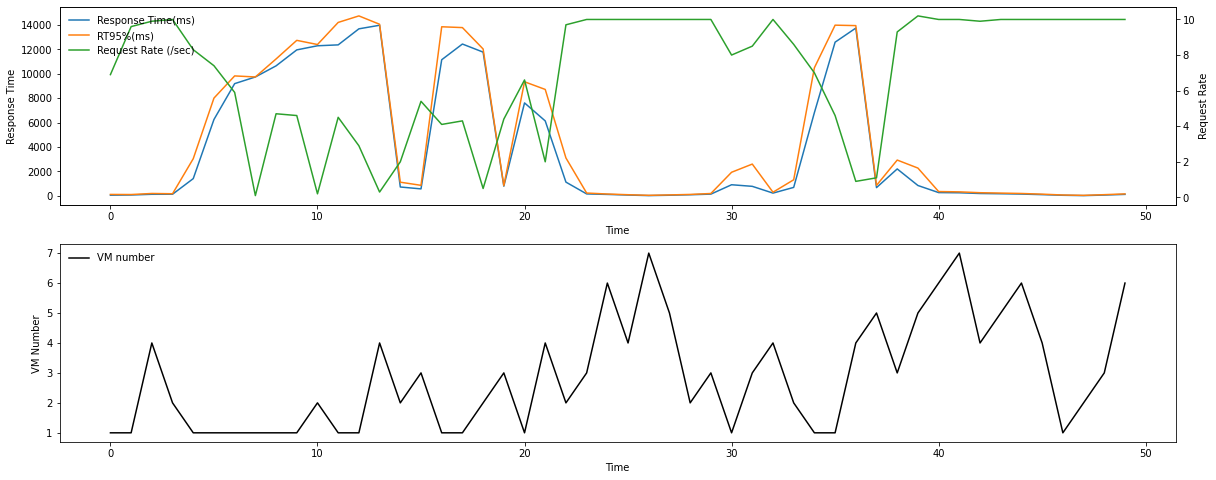

In [10]:
show(0, 50)

In [11]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,200.00,200.00,200.00,200.00
mean,"2,103.01","1,639.59",4.45,8.67
std,"3,779.73","3,340.62",2.54,2.47
min,41.71,23.06,1.00,0.10
25%,193.10,138.10,2.00,8.57
50%,334.96,255.74,4.50,9.95
75%,"1,400.19",744.25,7.00,10.00
max,"14,741.35","13,974.87",8.00,10.20


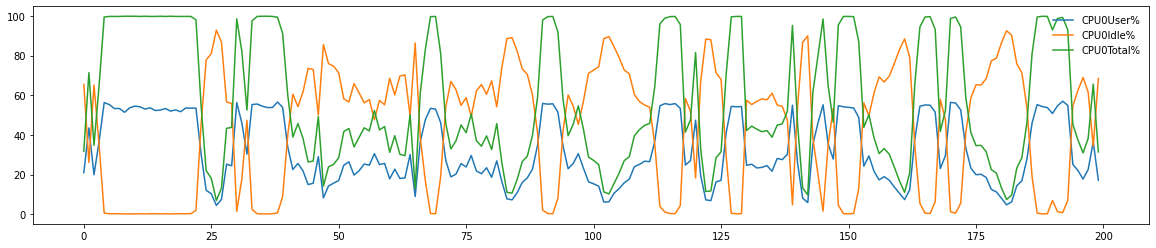

In [12]:
def plot_timeseries_metrics(name: str):

    plt.figure(figsize=(20, 4))

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.plot(df[col_name], label = col_name)

    plt.legend(frameon=False)
    plt.show()

plot_timeseries_metrics('CPU')

In [13]:
df.iloc[:, 7:10].describe()

,CPU0User%,CPU0Idle%,CPU0Total%
count,200.00,200.00,200.00
mean,32.10,42.93,56.91
std,16.90,31.28,31.37
min,4.40,0.10,6.90
25%,18.45,3.45,31.50
50%,26.45,54.45,45.45
75%,53.00,68.10,96.47
max,57.00,92.90,99.90


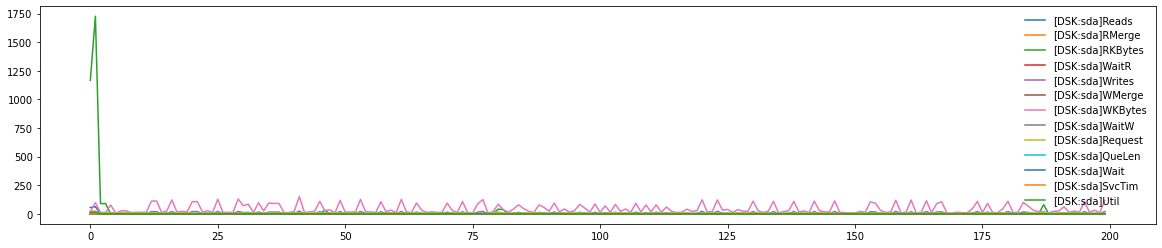

In [14]:
plot_timeseries_metrics('DSK')

In [15]:
df.iloc[:, 10:23].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,0.74,0.24,17.18,0.07,6.50,2.73,44.11,0.87,7.68,0.11,0.91,1.66,0.57
std,5.95,2.30,147.13,0.14,7.91,1.62,39.77,0.27,2.51,0.08,0.29,0.54,1.31
min,0.00,0.00,0.00,0.00,0.30,0.20,5.60,0.20,1.70,0.00,0.20,0.20,0.10
25%,0.00,0.00,0.00,0.00,0.60,2.00,14.00,0.80,6.00,0.00,0.80,1.30,0.20
50%,0.00,0.00,0.00,0.00,2.20,2.40,22.40,0.90,7.50,0.10,0.90,1.70,0.40
75%,0.00,0.00,0.00,0.00,13.93,3.02,80.53,1.00,9.22,0.20,1.00,2.00,0.50
max,63.00,23.00,"1,726.10",0.70,25.60,19.90,151.90,2.10,18.00,0.50,2.10,3.00,14.10


In [16]:
df.iloc[:, 23:31].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,"1,925,655.03","109,712.97","104,070.92","61,675.31","1,472,626.66",0.00,"149,876.59",100.00
std,"6,393.11","6,393.11",658.52,"1,333.41","1,246.03",0.00,"2,008.30",0.00
min,"1,915,782.00","98,503.60","101,524.80","56,614.40","1,467,744.00",0.00,"147,284.00",100.00
25%,"1,920,619.20","102,919.10","103,644.60","61,124.40","1,472,298.00",0.00,"148,195.20",100.00
50%,"1,922,607.60","112,760.40","103,970.40","61,950.80","1,472,808.40",0.00,"148,954.20",100.00
75%,"1,932,448.90","114,748.80","104,498.60","62,713.90","1,473,368.20",0.00,"151,836.50",100.00
max,"1,936,864.40","119,586.00","105,548.00","63,721.20","1,475,754.80",0.00,"153,490.00",100.00


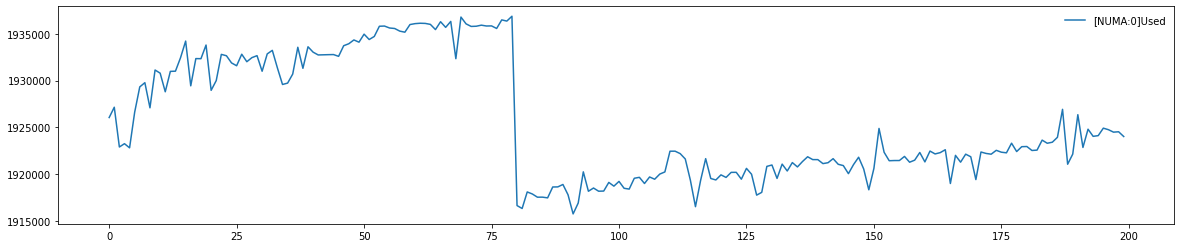

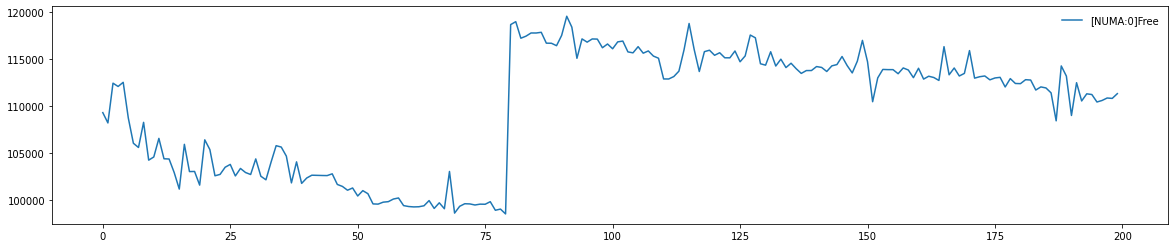

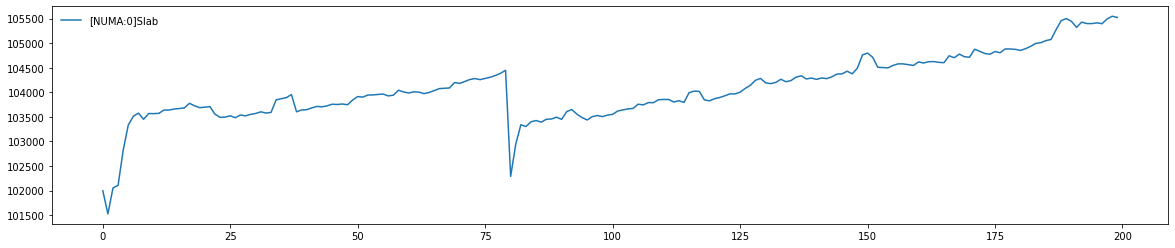

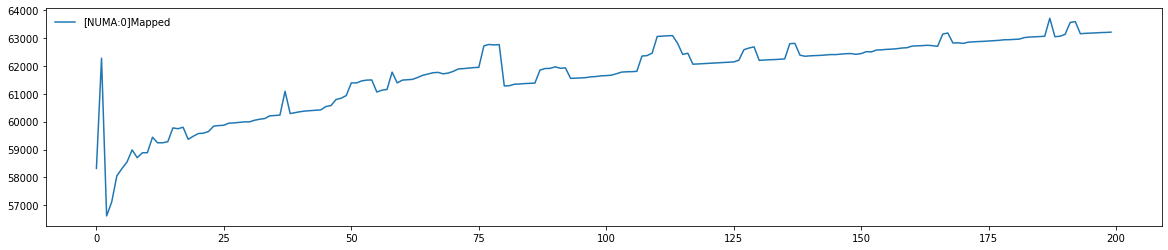

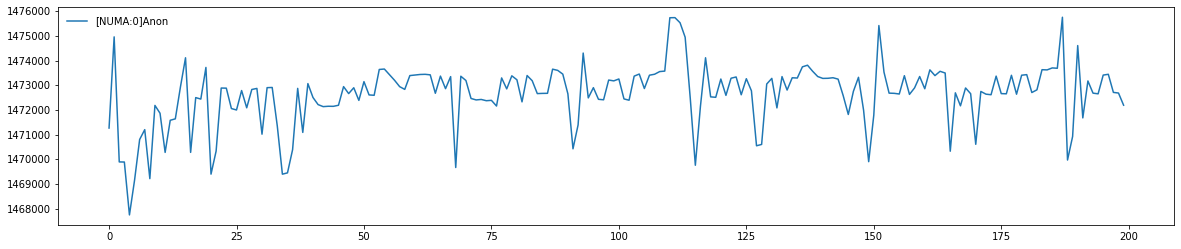

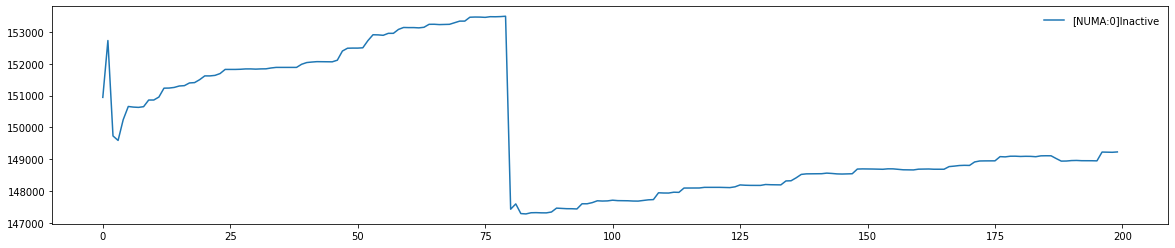

In [17]:
def plot_timeseries_metrics_separate(name: str):

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.figure(figsize=(20, 4))
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(df[col_name], label = col_name)
                plt.legend(frameon=False)
                plt.show()

plot_timeseries_metrics_separate('NUMA')

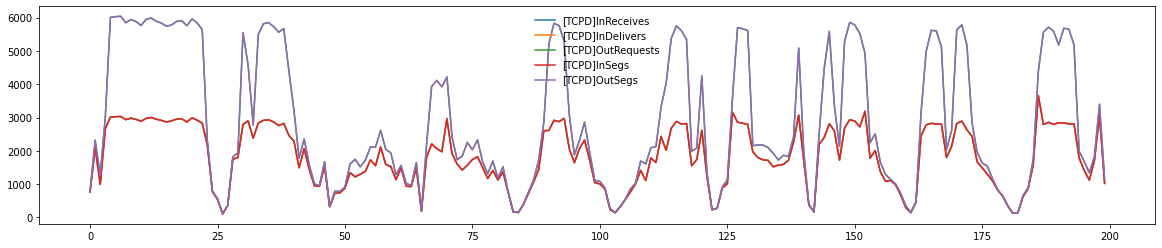

In [18]:
plot_timeseries_metrics('TCP')

## Before metric After metric

Itt állítom elő a metrikából a before after értékeket

Ennek a prototípusát dolgoztam ki és ellenőriztem le itt.

In [19]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.6,14:36:32,14:36:3,119.74,58.51,1,6.90,20.90,65.50,31.80,...,100.00,764.30,764.30,777.80,764.30,777.80,1,NaN,1.00,0.00
1,192.168.0.6,14:36:40,14:36:4,112.02,74.00,1,9.60,43.50,26.10,71.40,...,100.00,"2,093.20","2,093.20","2,322.50","2,092.10","2,321.50",1,1.00,4.00,3.00
2,192.168.0.6,14:36:50,14:36:5,198.66,132.53,4,9.90,19.90,65.20,34.70,...,100.00,991.80,991.80,"1,267.40",991.80,"1,267.50",4,1.00,2.00,-2.00
3,192.168.0.6,14:37:00,14:37:0,176.41,135.79,2,10.00,36.70,35.00,64.90,...,100.00,"2,667.60","2,667.60","3,033.80","2,667.60","3,033.90",2,4.00,1.00,-1.00
4,192.168.0.6,14:37:14,14:37:1,"3,047.39","1,415.88",1,8.30,56.30,0.50,99.50,...,100.00,"3,018.60","3,018.60","6,009.80","3,018.60","6,009.80",1,2.00,1.00,0.00


In [20]:
mf['delta_vm'].unique()

array([ 0.,  3., -2., -1.,  1., -3.,  2., nan])

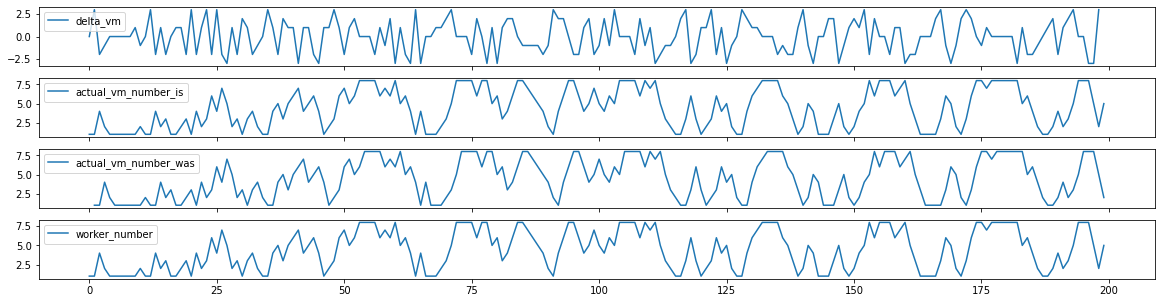

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'], label='delta_vm'); ax1.legend()
ax2.plot(mf['actual_vm_number_is'], label='actual_vm_number_is'); ax2.legend()
ax3.plot(mf['actual_vm_number_was'], label='actual_vm_number_was'); ax3.legend()
ax4.plot(mf['worker_number'], label='worker_number'); ax4.legend()
plt.show()

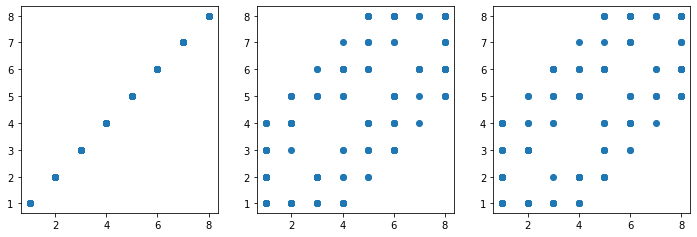

In [22]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3.8))
ax0.scatter(mf['worker_number'], mf['actual_vm_number_is'])
ax1.scatter(mf['worker_number'], mf['actual_vm_number_was'])
ax2.scatter(mf['worker_number'], mf['actual_vm_number_will'])
plt.show()

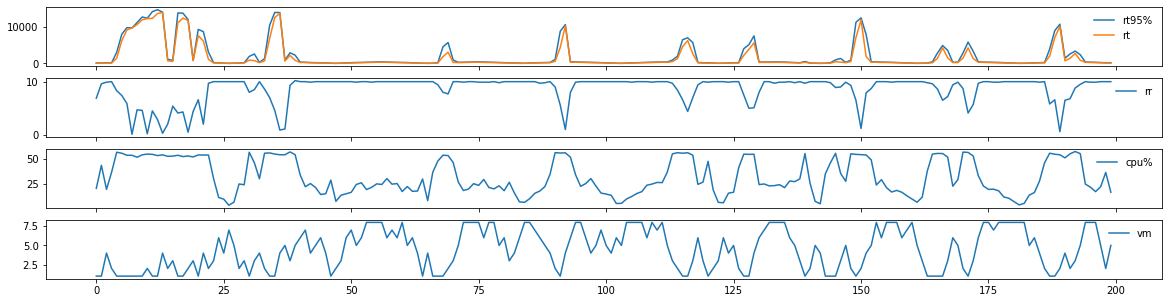

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'], label='rt95%'); ax1.legend(frameon=False)
ax1.plot(mf['response_time'], label='rt');        ax1.legend(frameon=False)
ax2.plot(mf['request_rate'], label='rr');         ax2.legend(frameon=False)
ax3.plot(mf['CPU0User%'], label='cpu%');          ax3.legend(frameon=False)
ax4.plot(mf['worker_number'], label='vm');        ax4.legend(frameon=False)
plt.show()

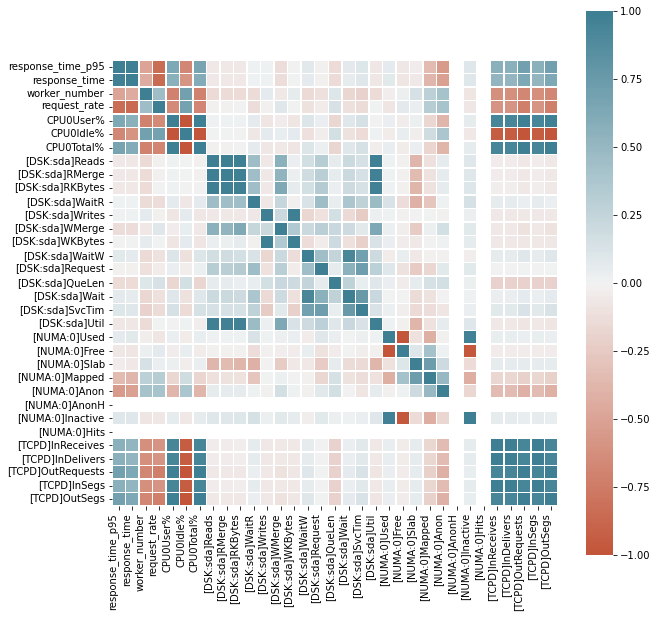

In [24]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [25]:
input_variables = ['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', 'request_rate', 'response_time', 'worker_number']

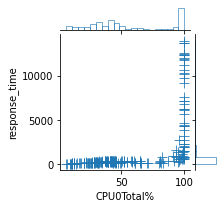

In [26]:
sns.jointplot(
    height=3.0,
    data=df, x='CPU0Total%', y='response_time',
    marker="+", s=100, marginal_kws=dict(bins=20, fill=False),
); plt.show()

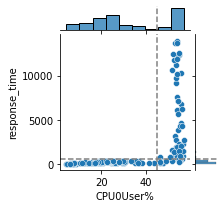

In [27]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

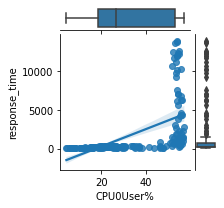

In [28]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.regplot, sns.boxplot); plt.show()

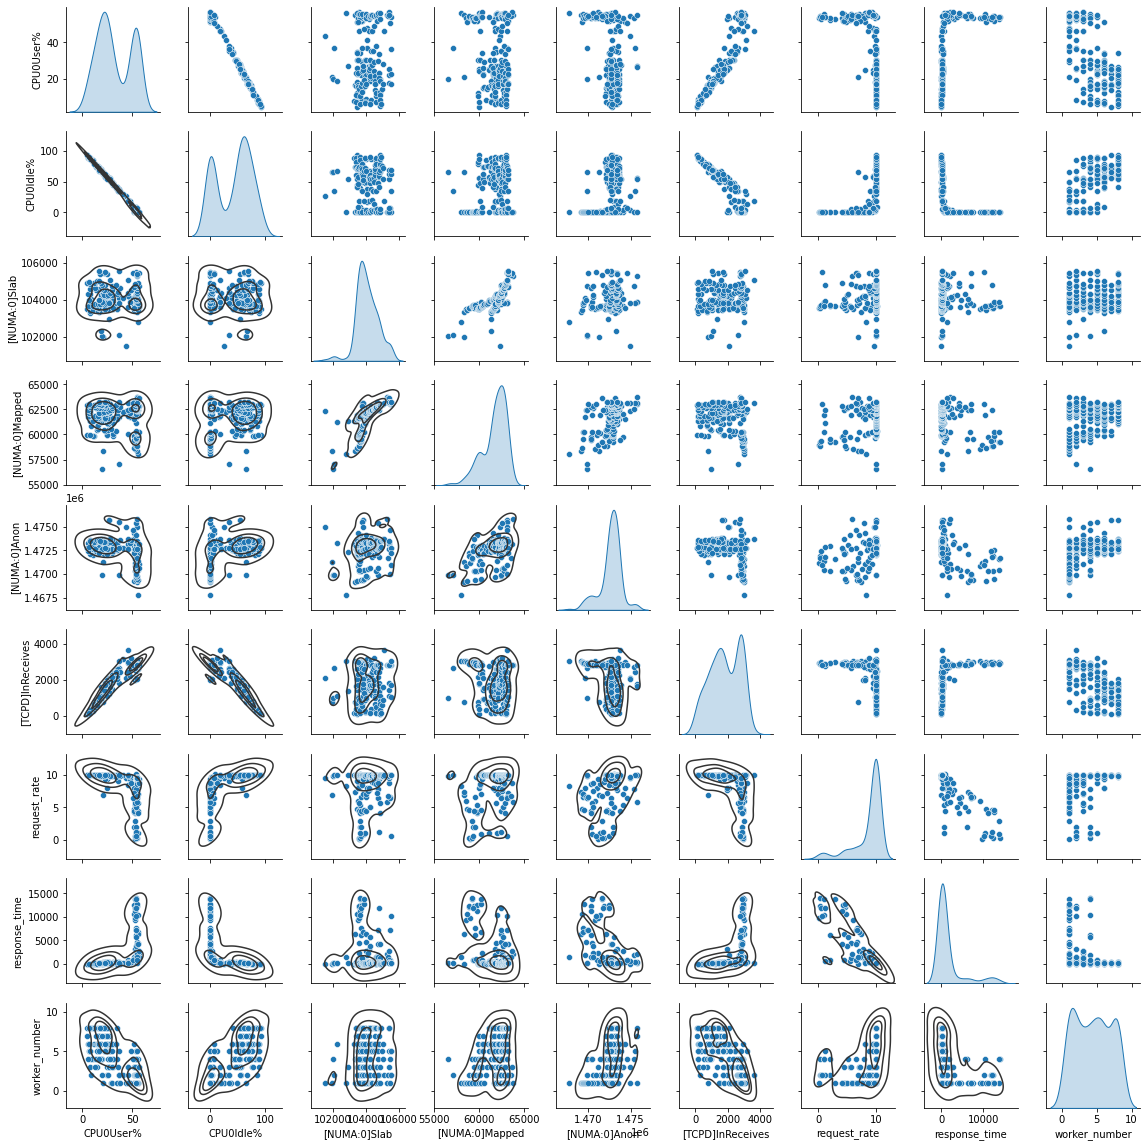

In [29]:
g = sns.pairplot(df[input_variables], diag_kind='kde', height=1.8)
g.map_lower(sns.kdeplot, levels=4, color='.2'); plt.show()

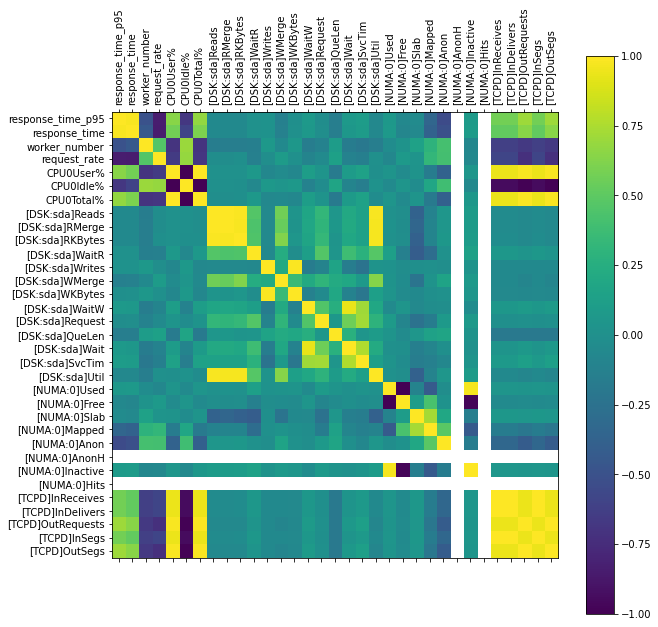

In [30]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=16);

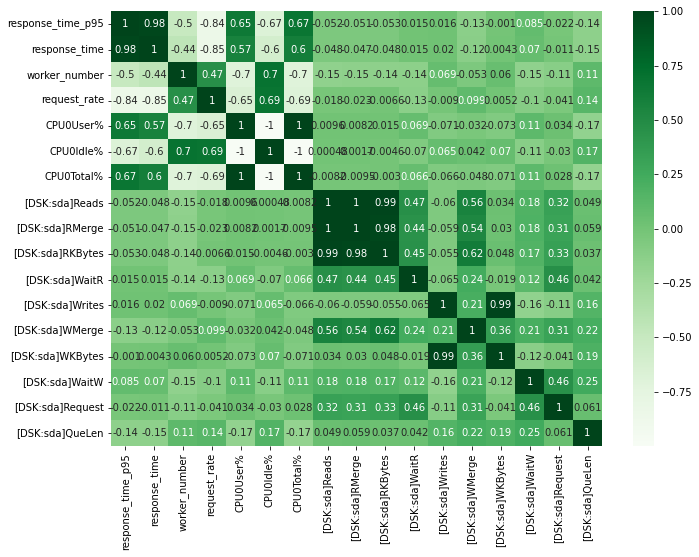

In [31]:
df = df.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [32]:
df.isnull().values.any()

False

In [33]:
# kibaszni azokat az oszlopokat amelyek értéke konstans

for c in df.select_dtypes(exclude='object').columns:
    std = df[c].std()
    if std == 0:
        df.drop([c], axis=1, inplace=True)
        print(c)

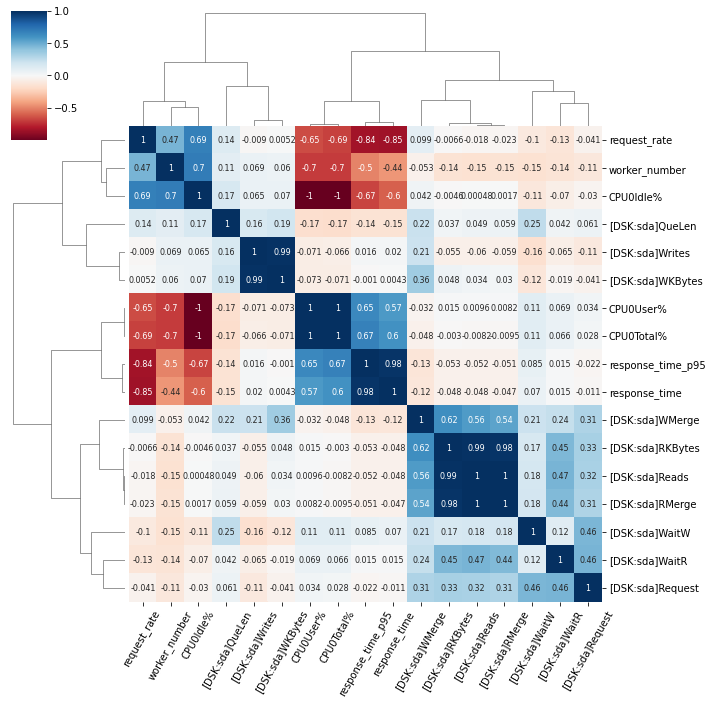

In [34]:
g = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

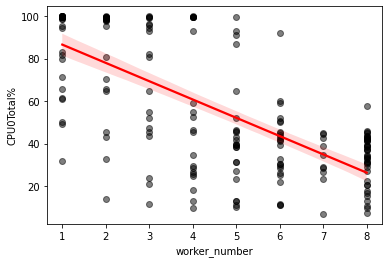

In [35]:
def scatter(x, y, color='black', alpha=0.5, lc='red', ci=95):
    sns.regplot(x=x,
                y=y,
                scatter_kws={
                    'color': color,
                    'alpha': alpha
                },
                line_kws={
                    'color': lc
                },
                ci=95)
    plt.show()

scatter(mf['worker_number'], mf['CPU0Total%'])

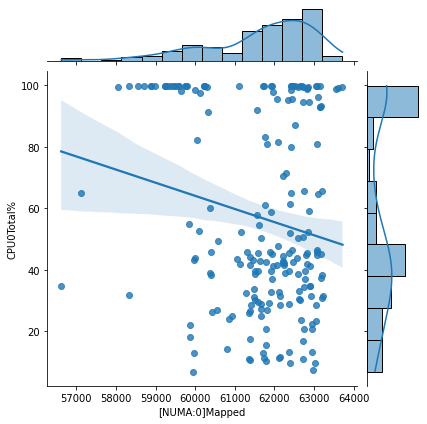

In [36]:
def join(x, y, data):
    sns.jointplot(x=x, y=y, data=data, kind='reg');

join('[NUMA:0]Mapped', 'CPU0Total%', mf)

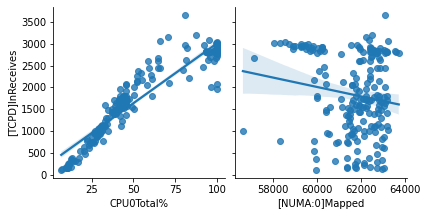

In [37]:
def pair(x_vars, y_vars, data):
    sns.pairplot(data, x_vars=x_vars, y_vars=y_vars,
             height=3, aspect=1.0, kind='reg');

pair(['CPU0Total%', '[NUMA:0]Mapped'], ['[TCPD]InReceives'], mf)

In [38]:

# Itt a vége fuss el véle


In [39]:
# Control the chaos